In [11]:
import json
from os import read

from arrow import get
from charts import (
    get_charts_data,
)

used_months = ["2024-04", "2024-05", "2024-06", "2024-07"]

def read_months_data(months = ["2024-07"]):
    all_issues = {}
    components = set()

    for month in months:
        json_file = open(f"data/{month}/issues.json")
        issues = json.load(json_file)

        _, issues_minimal, df_issues, df_issues_closed, issue_labels, component_names = get_charts_data(issues)

        all_issues[month] = issues_minimal
        components = components | component_names

    return all_issues, components

all_issues, component_names = read_months_data(used_months)

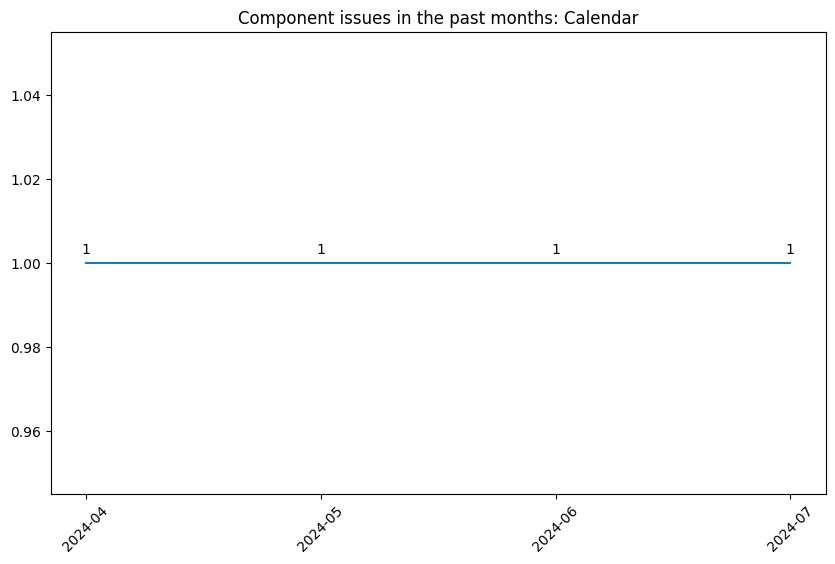

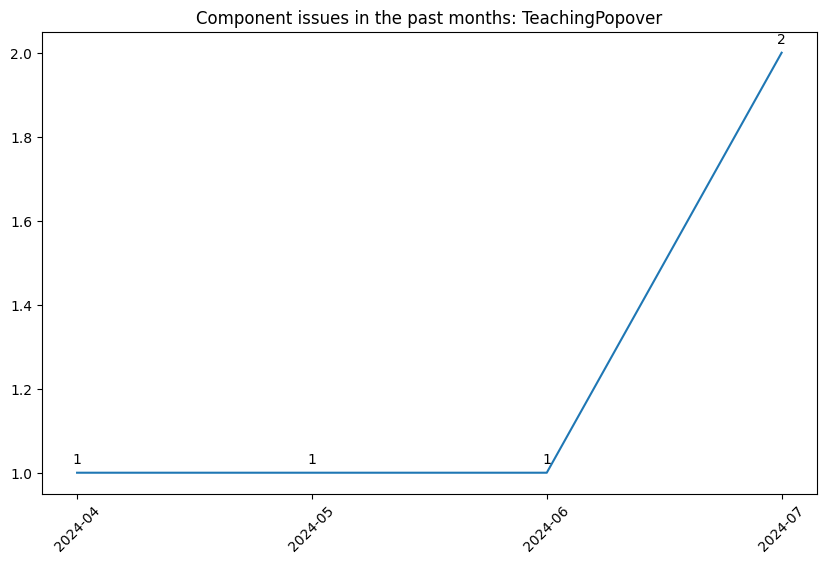

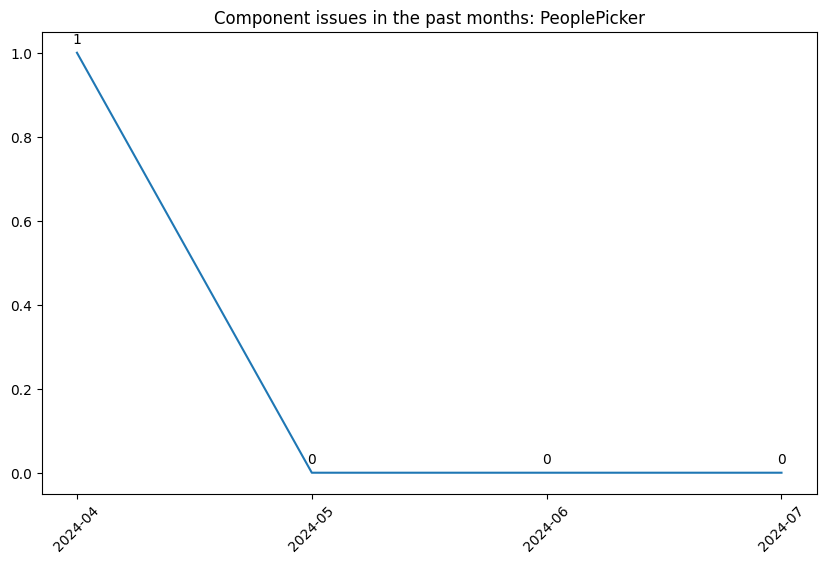

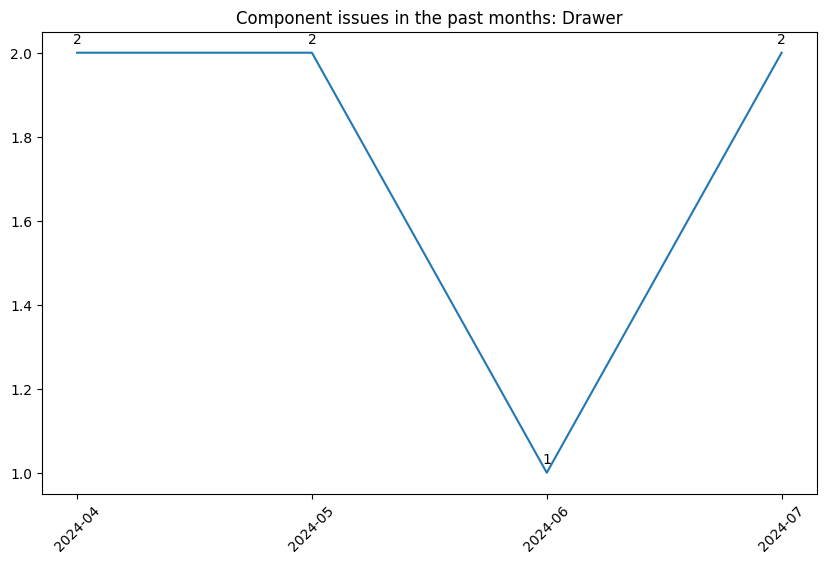

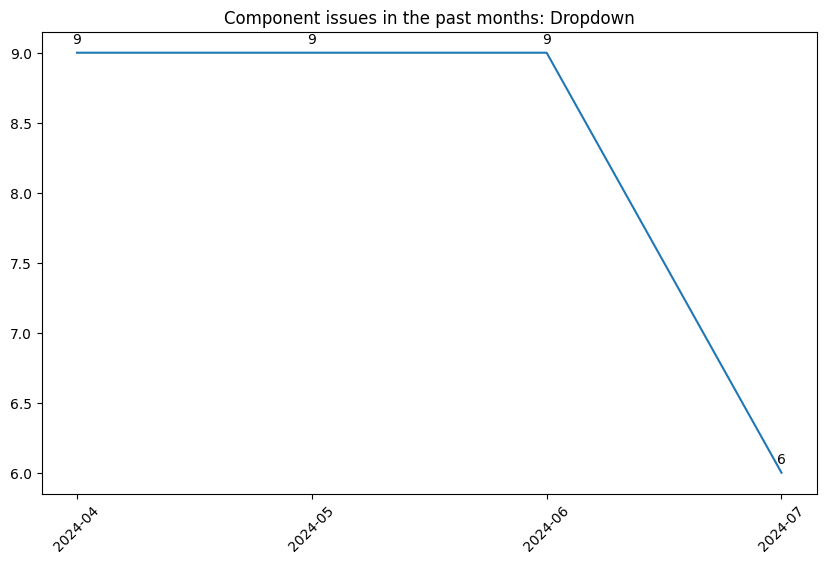

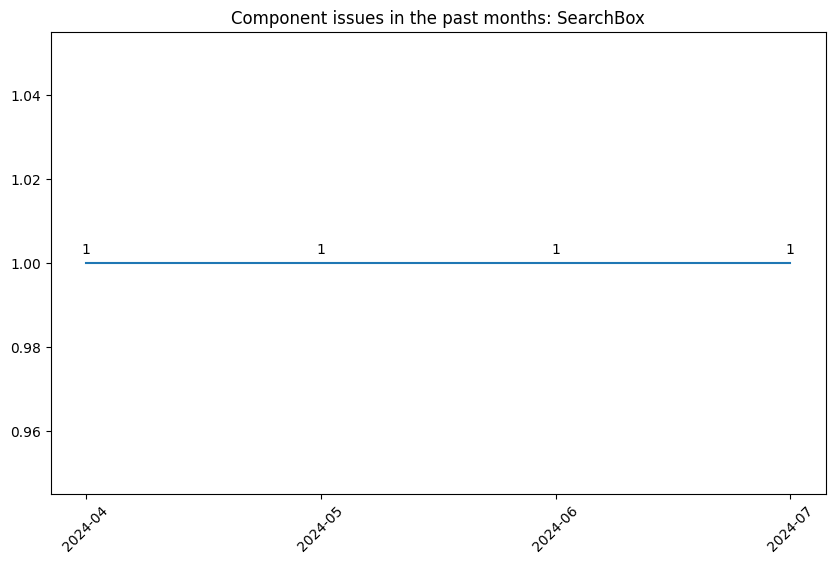

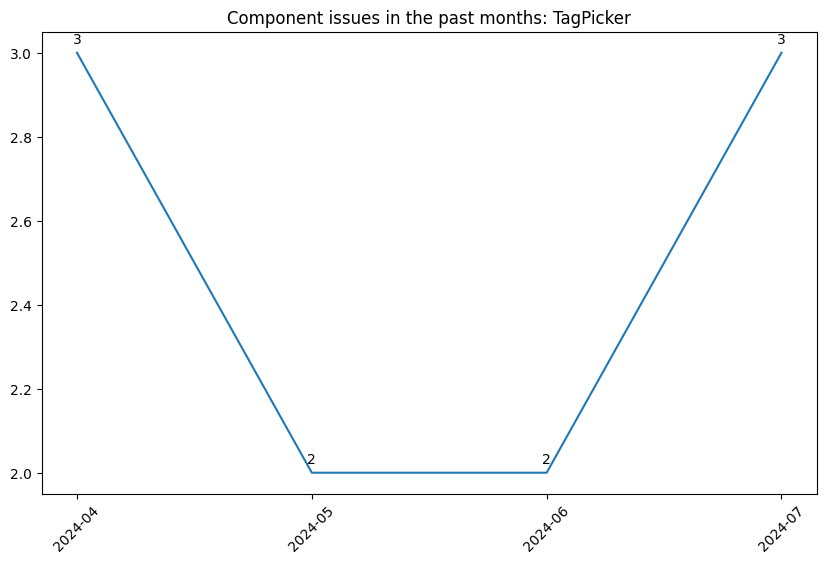

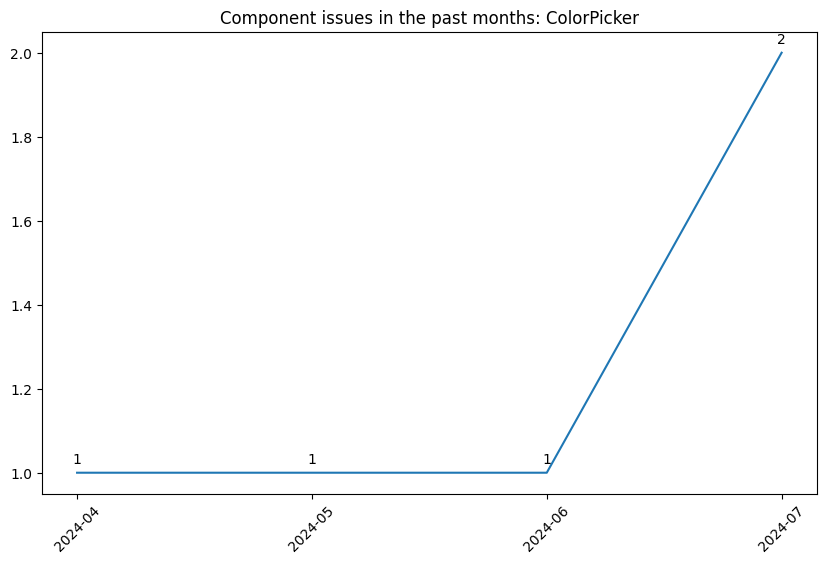

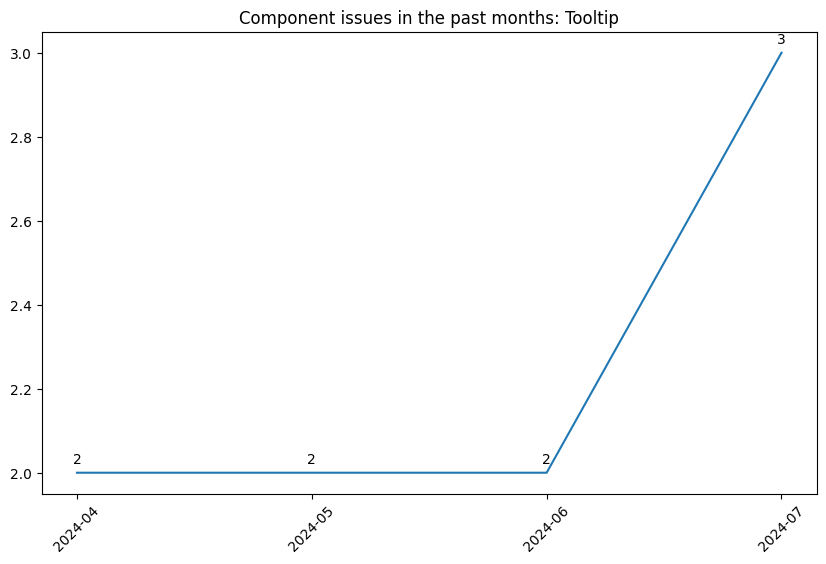

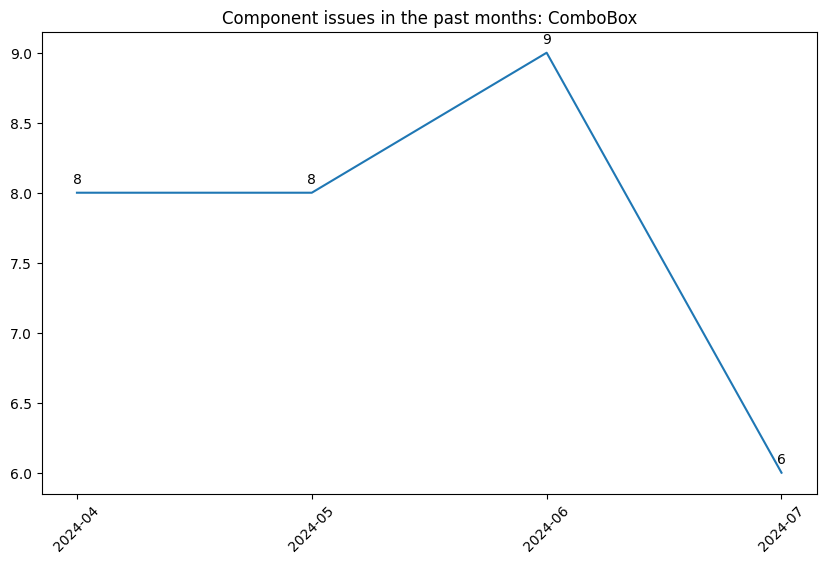

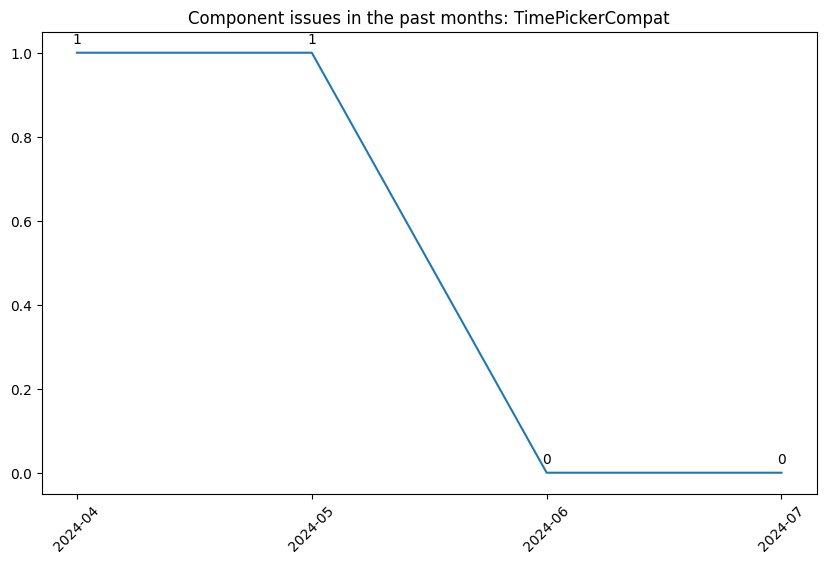

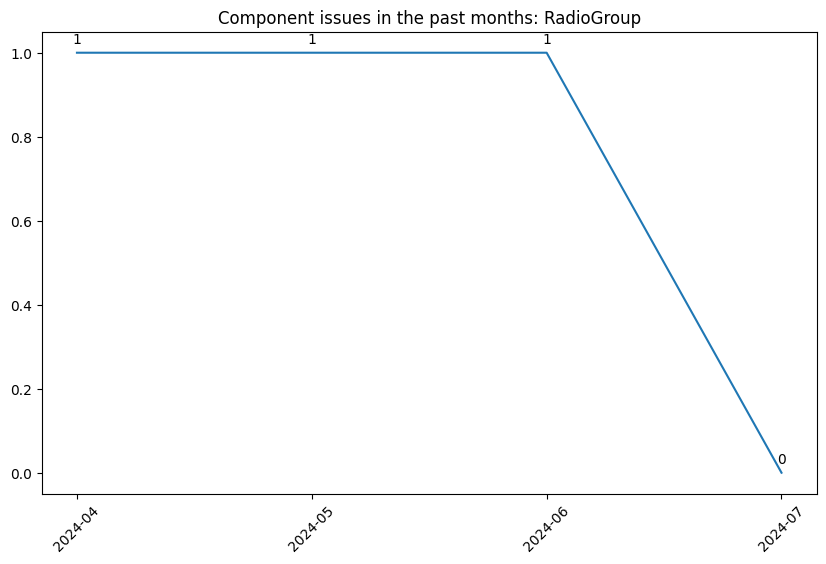

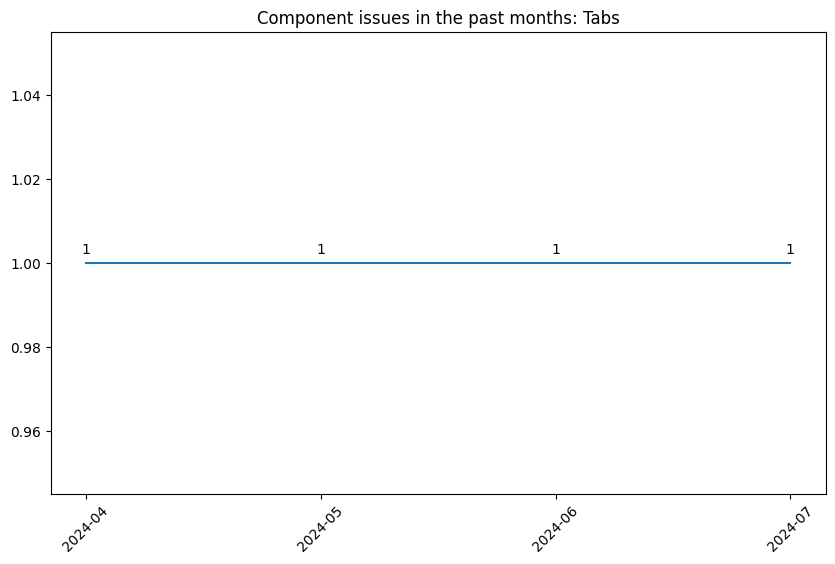

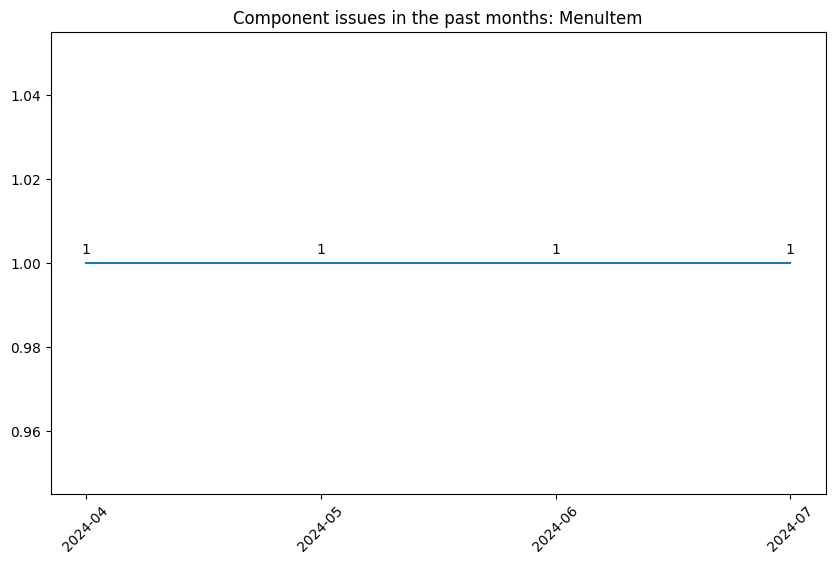

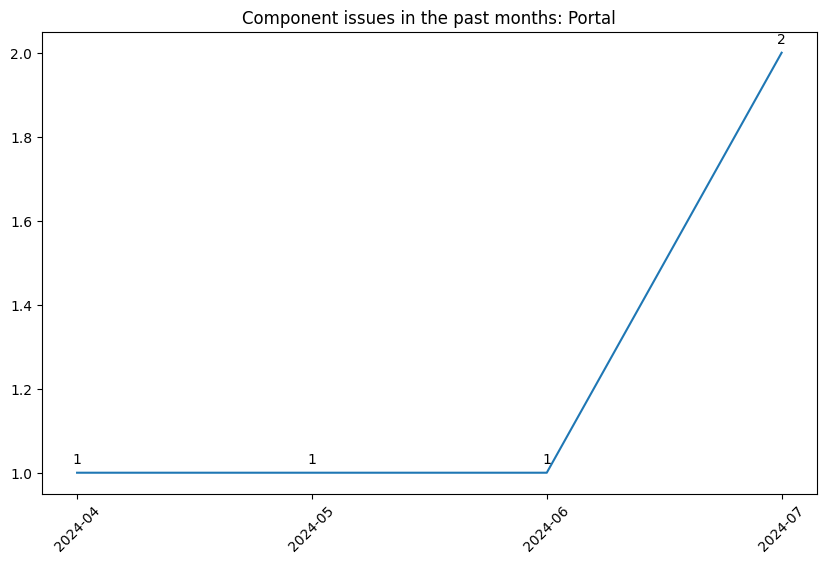

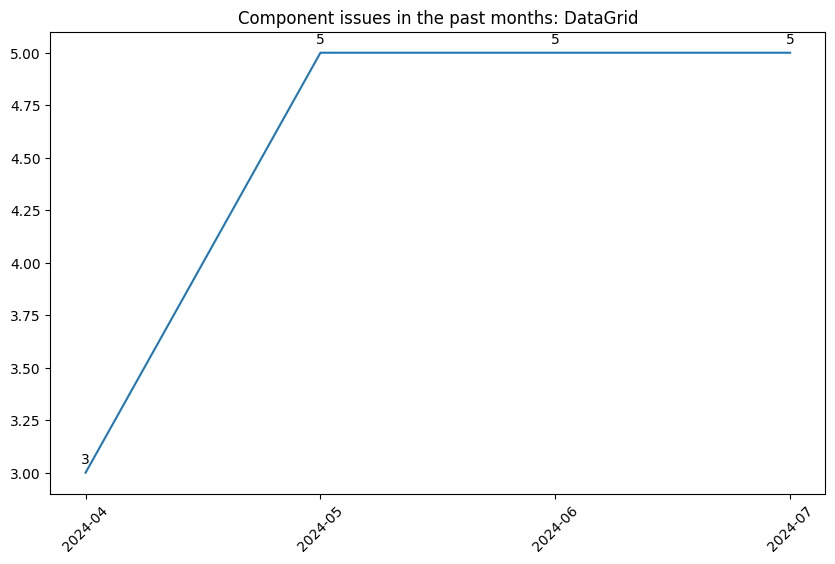

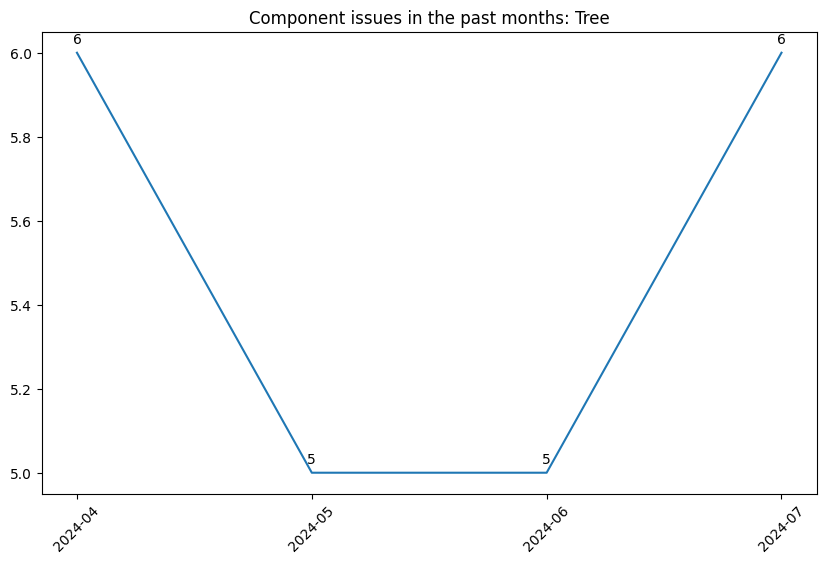

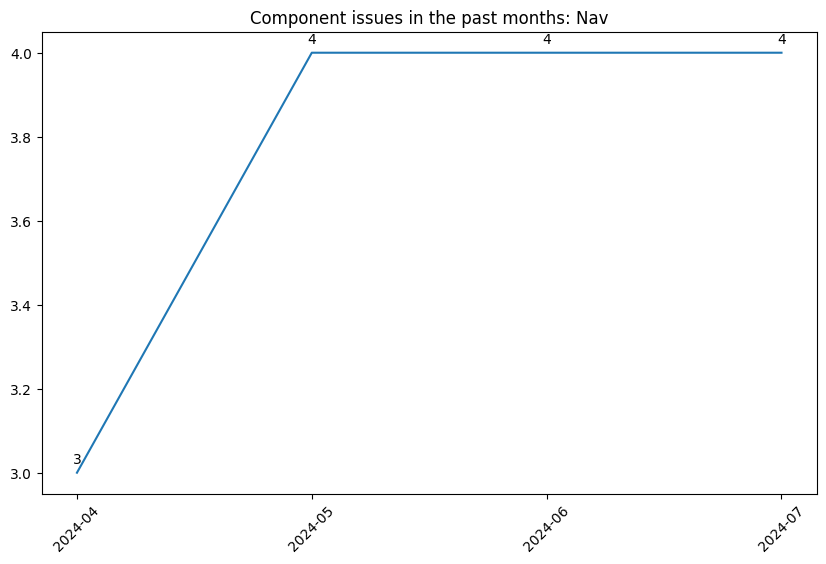

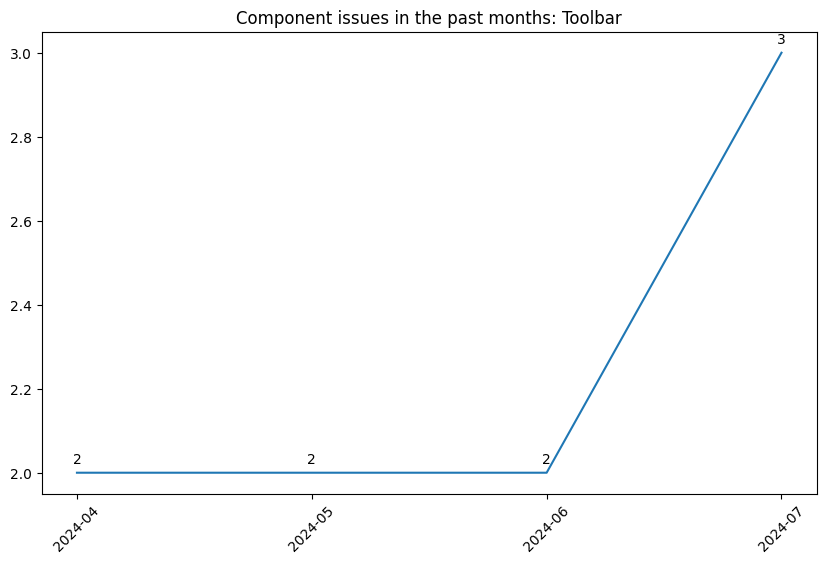

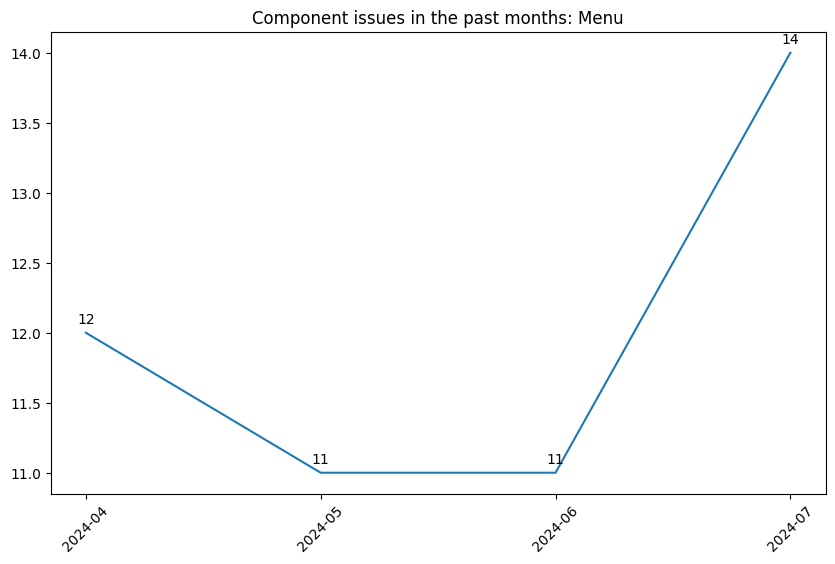

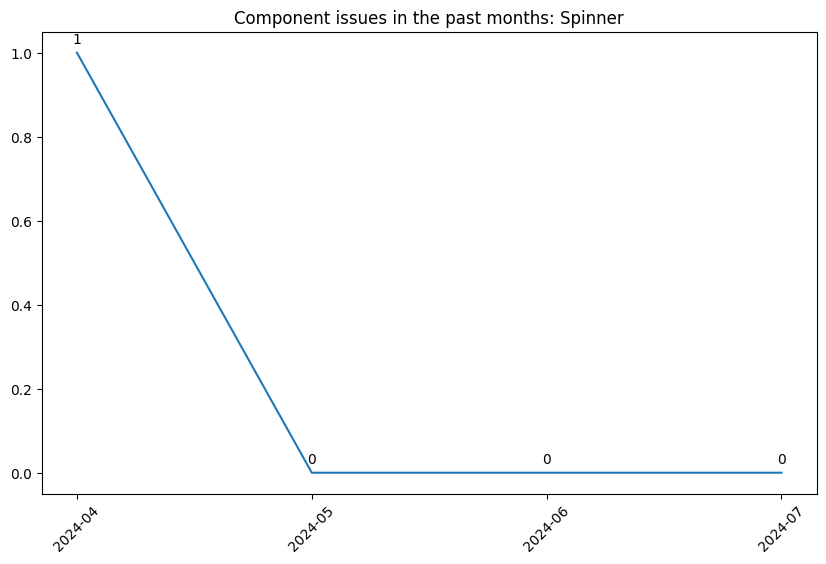

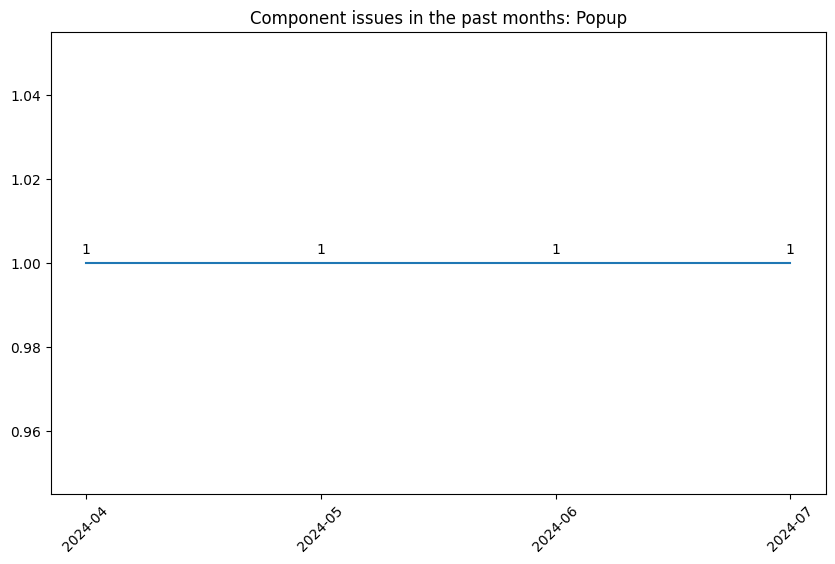

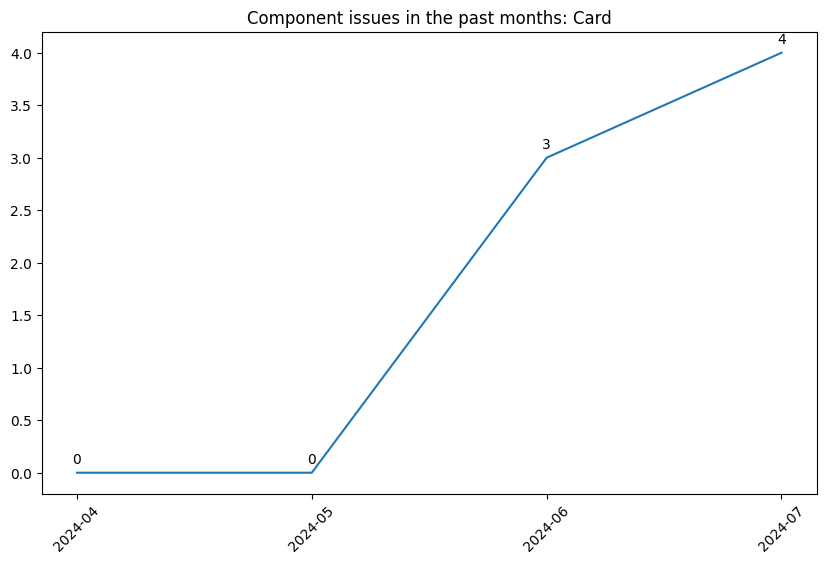

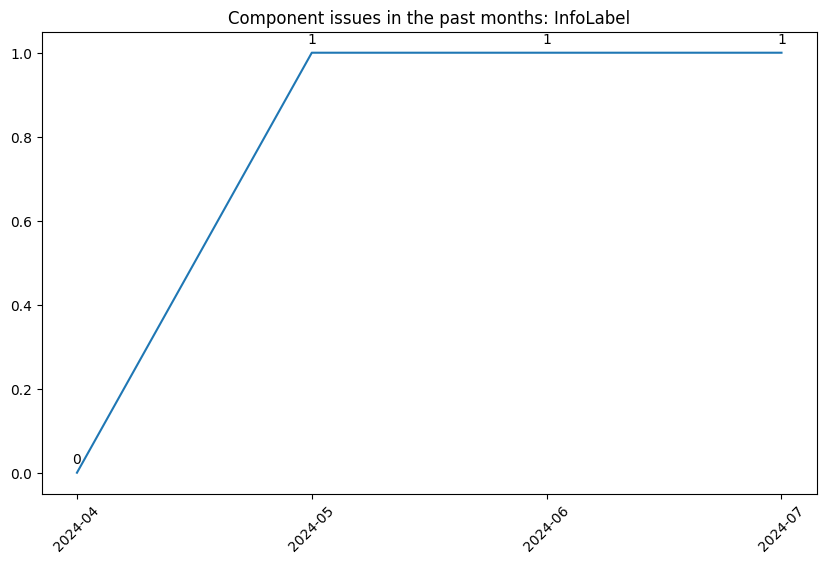

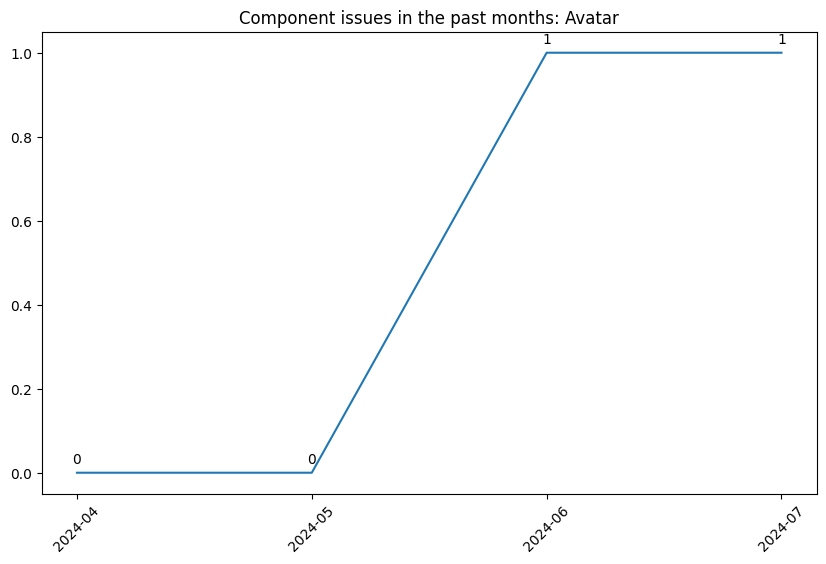

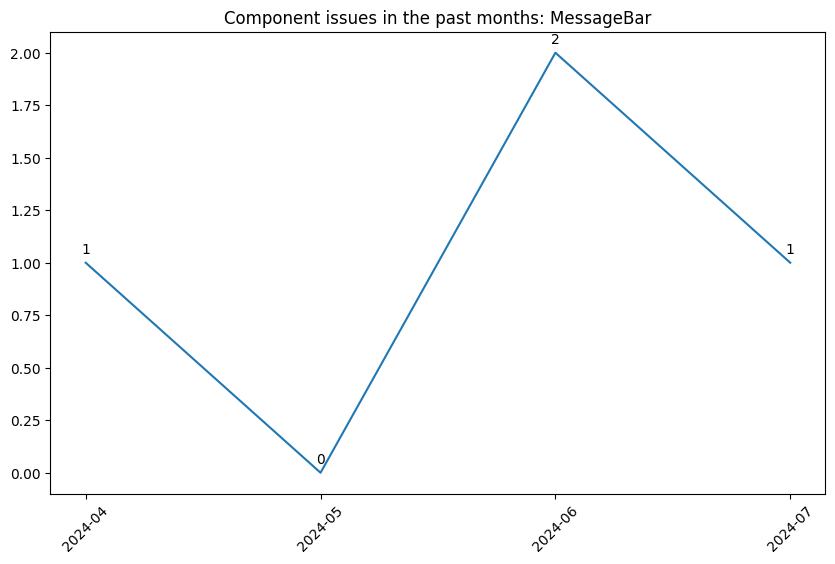

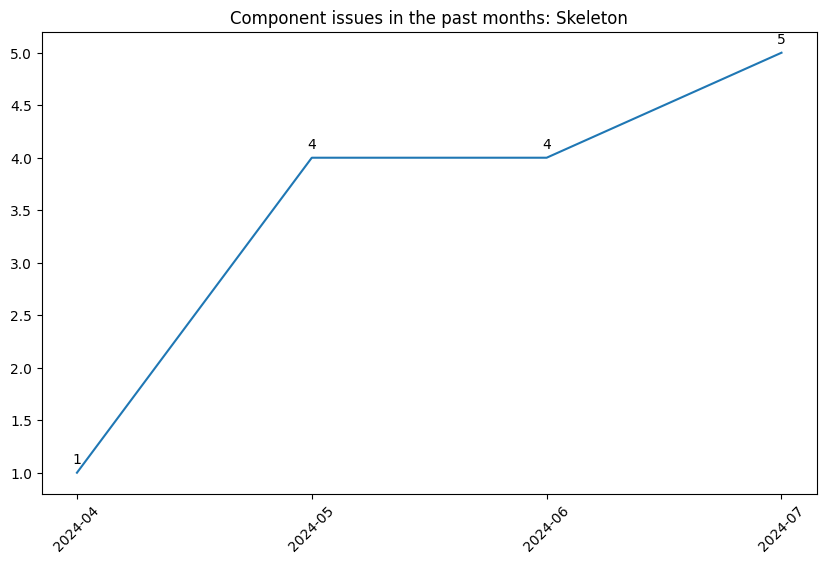

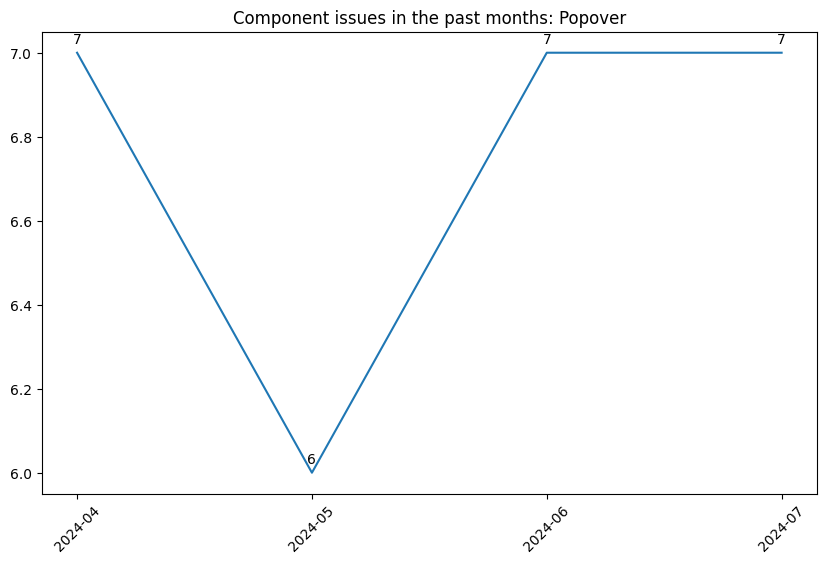

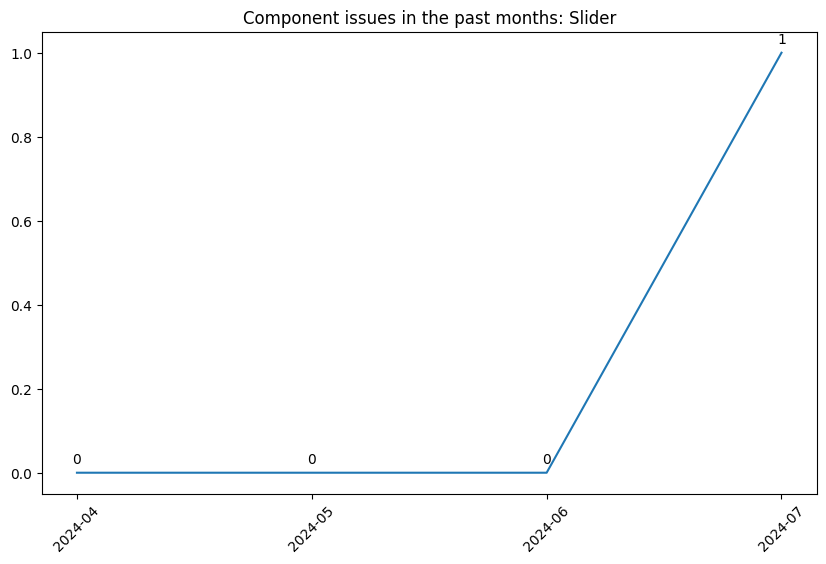

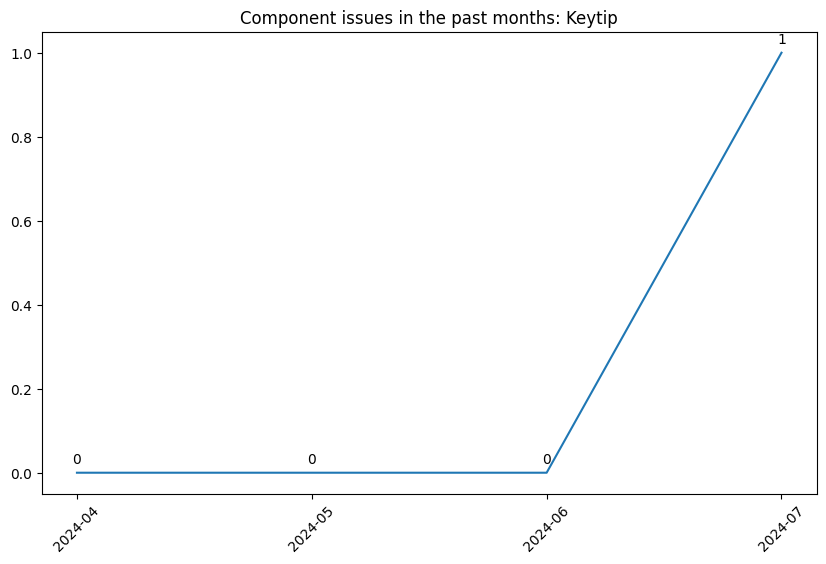

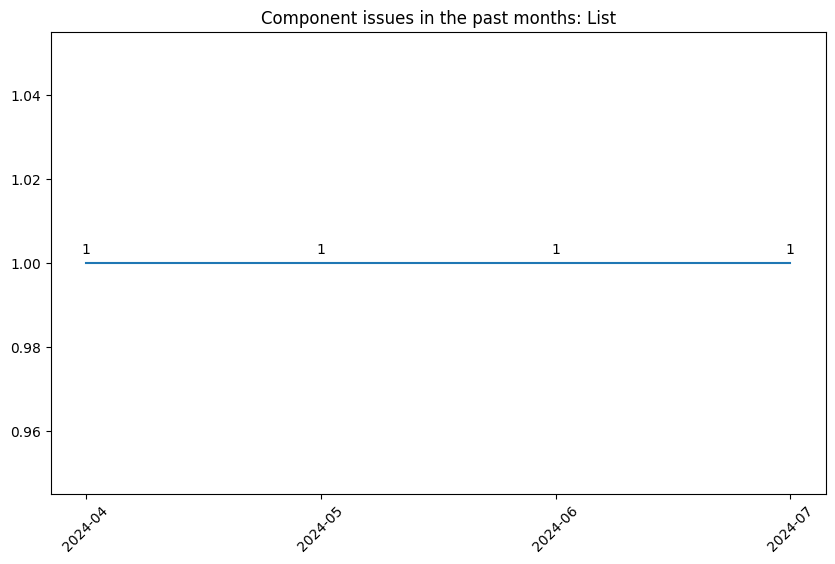

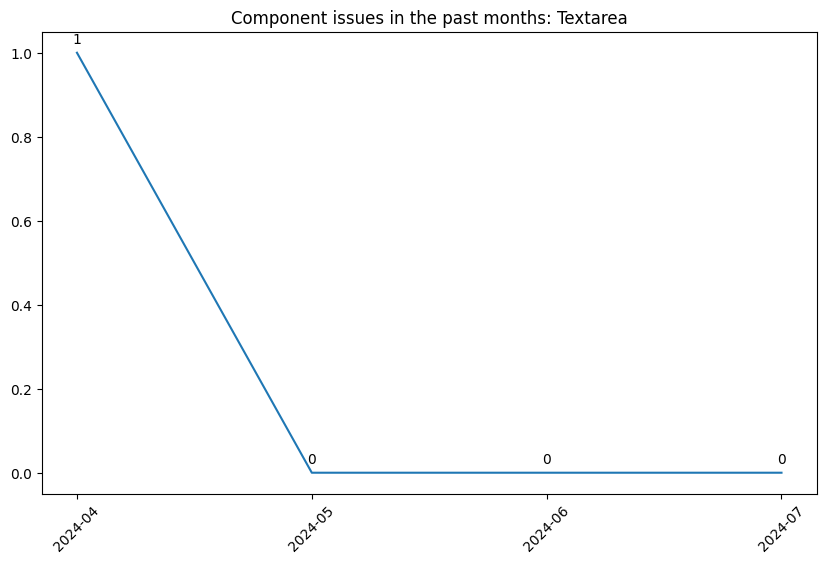

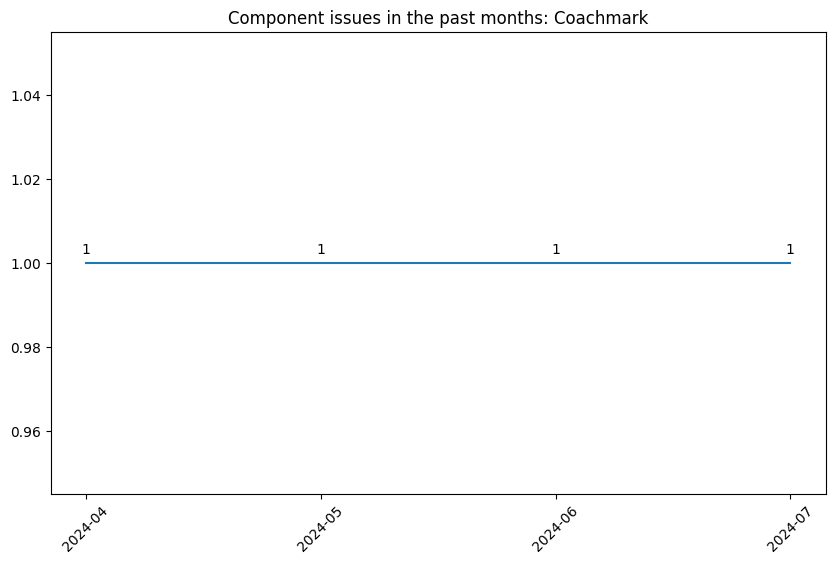

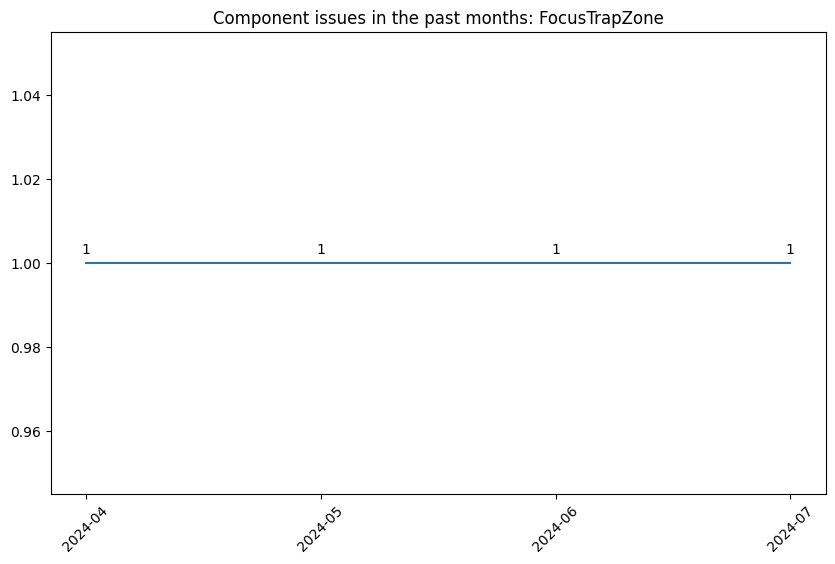

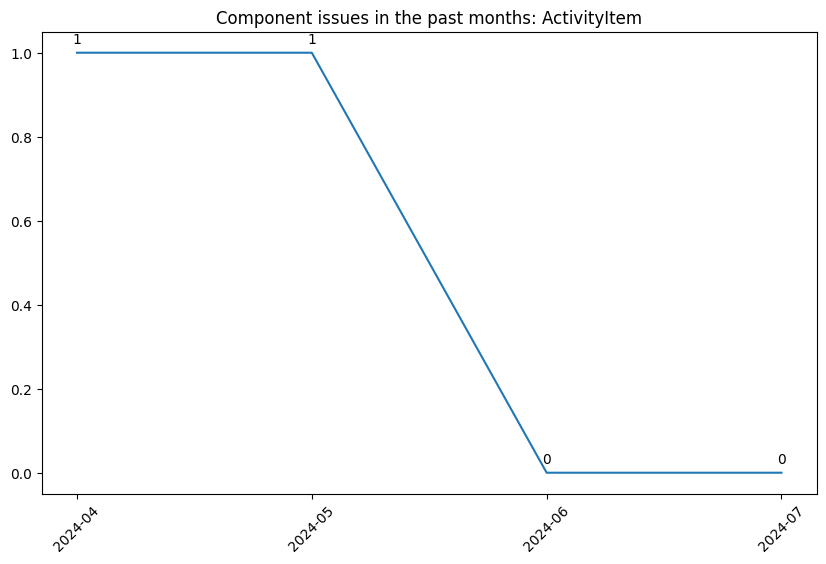

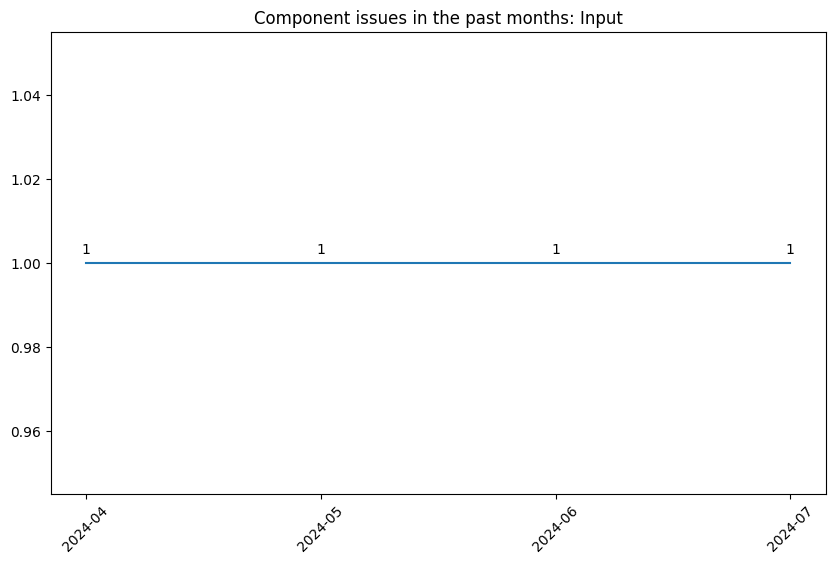

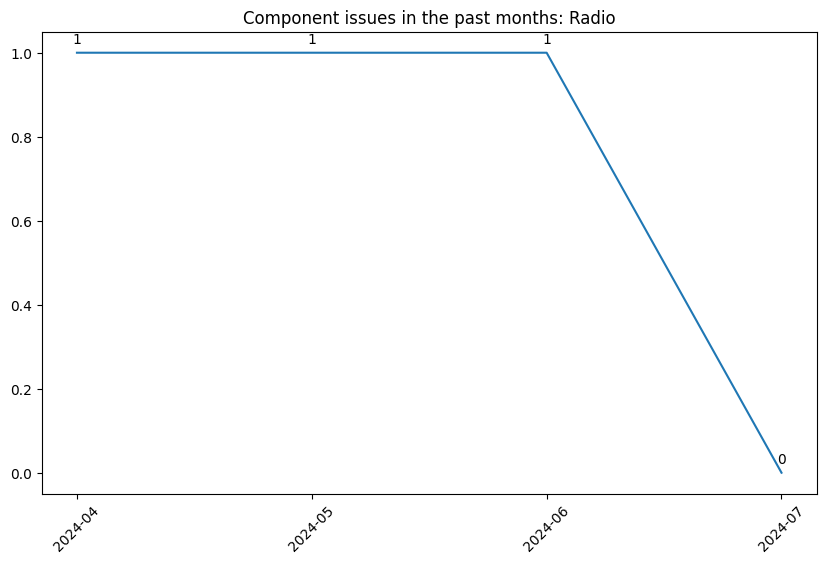

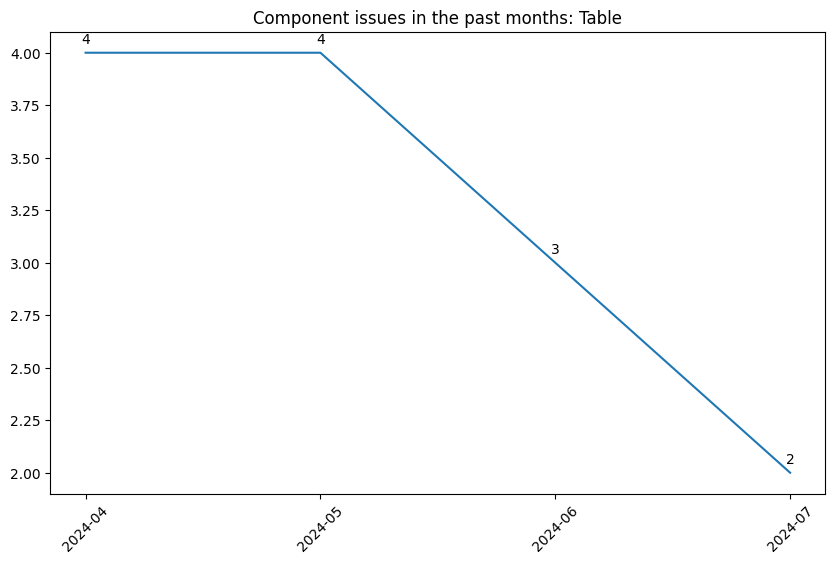

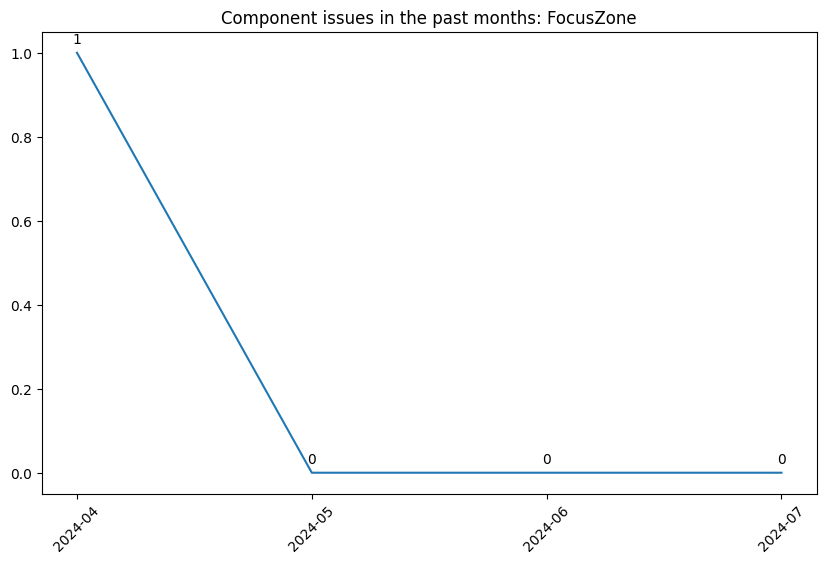

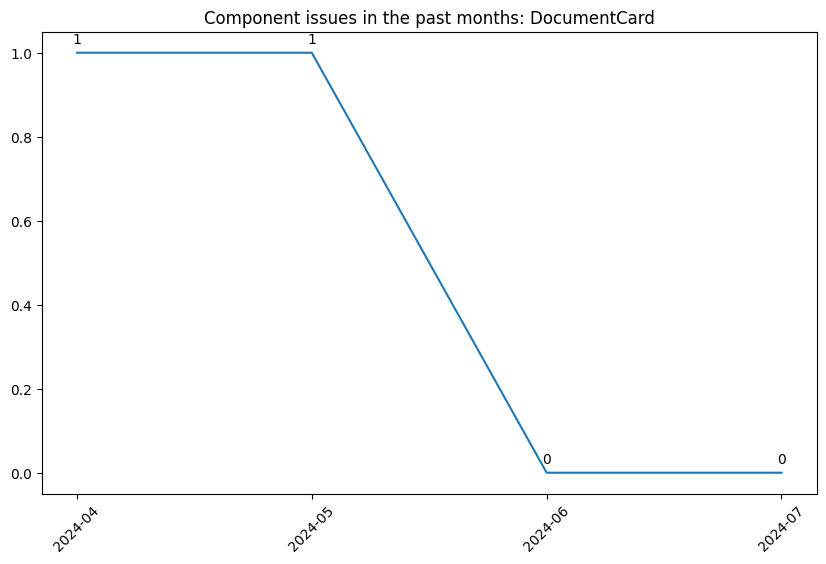

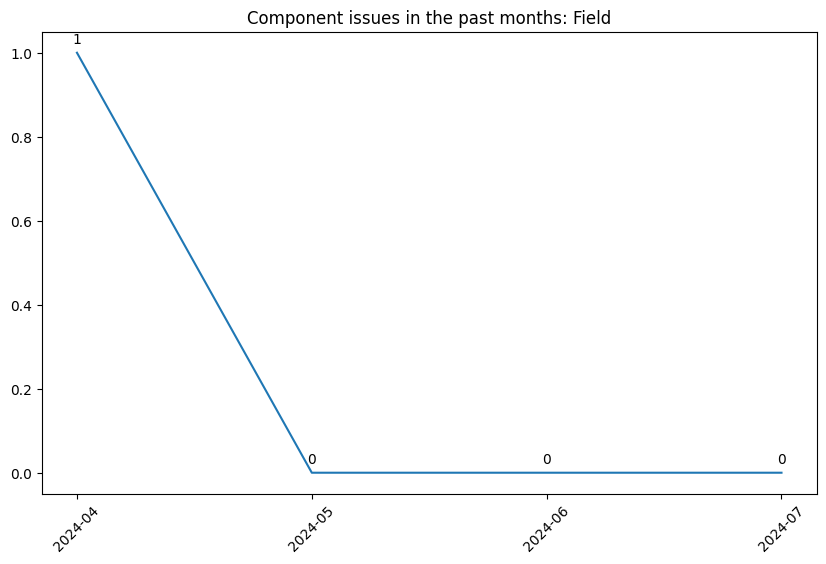

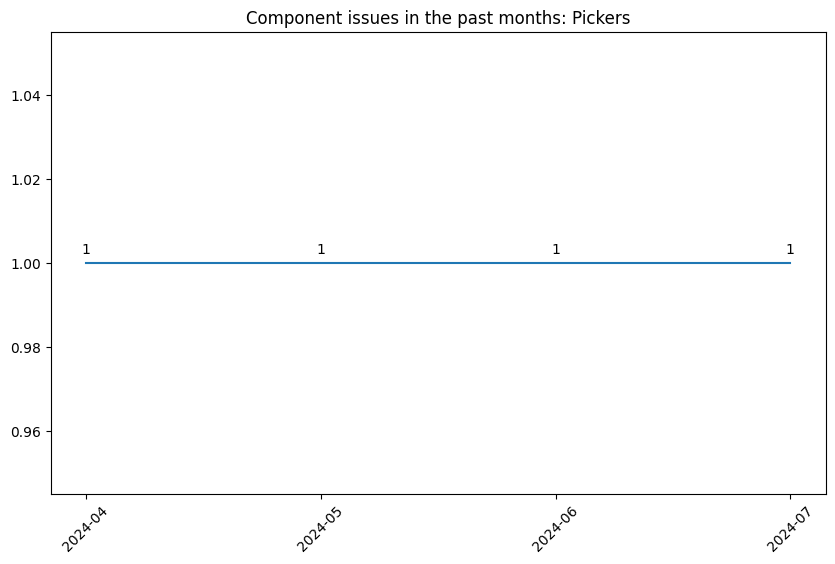

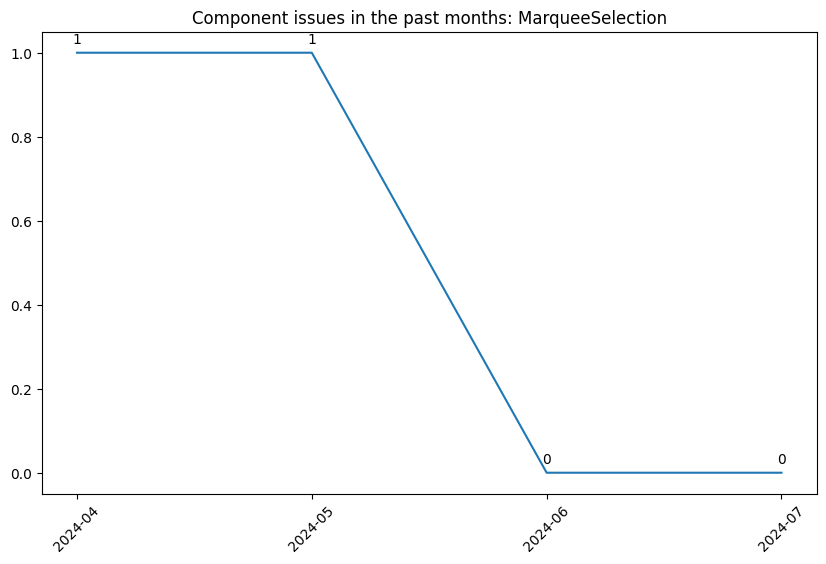

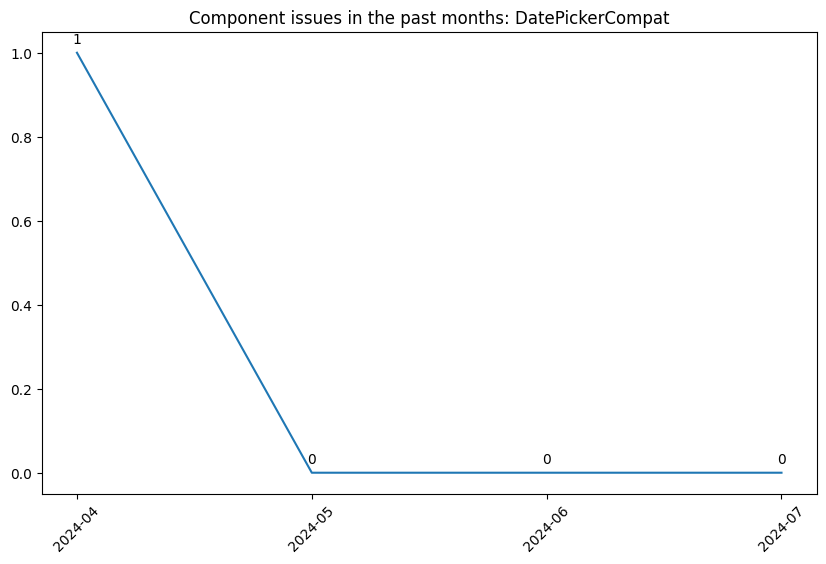

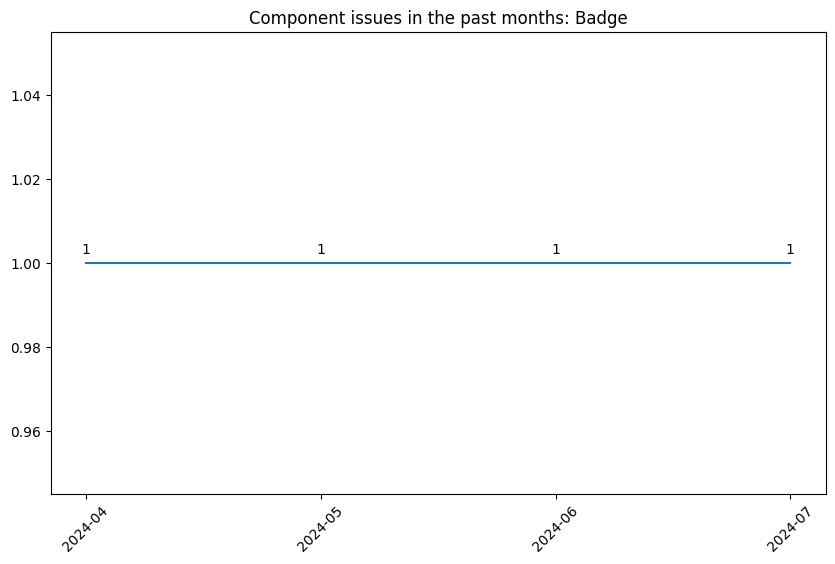

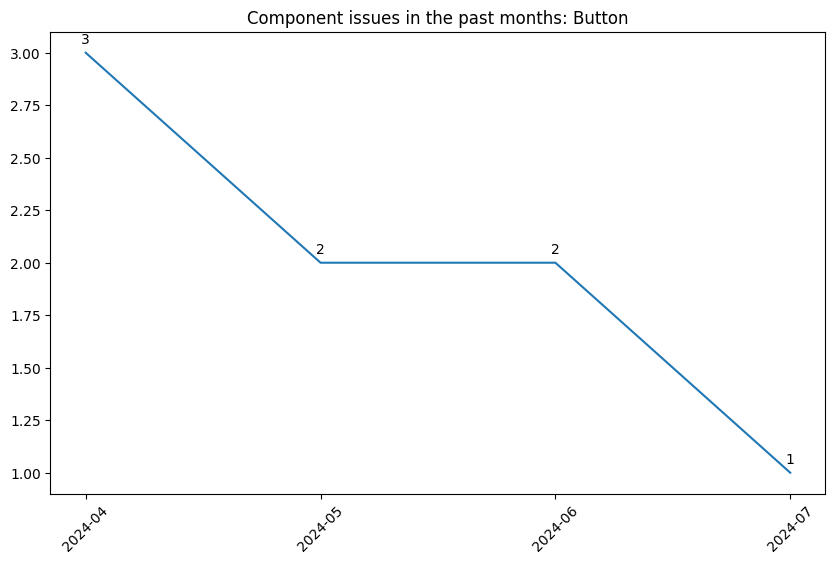

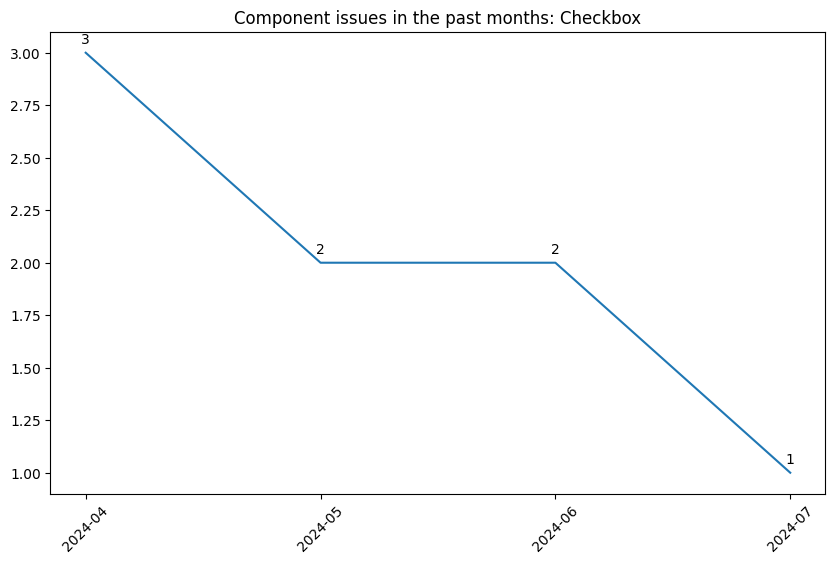

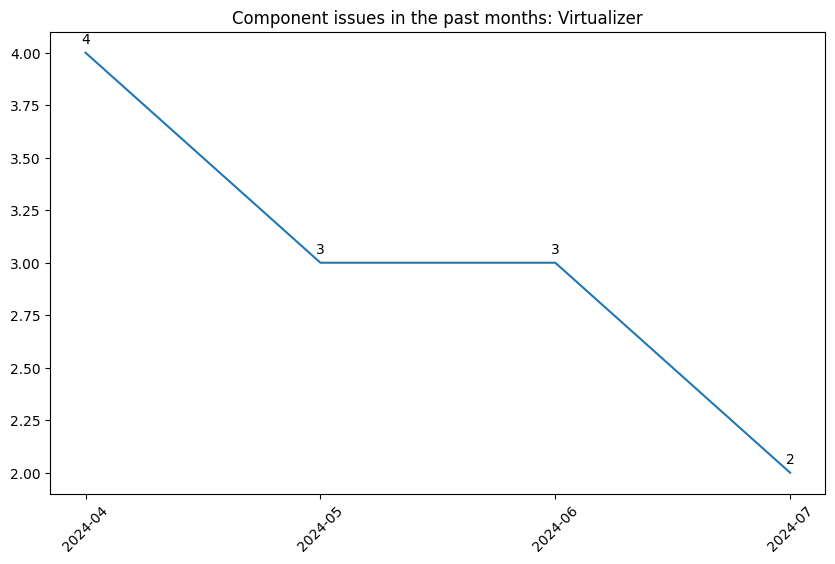

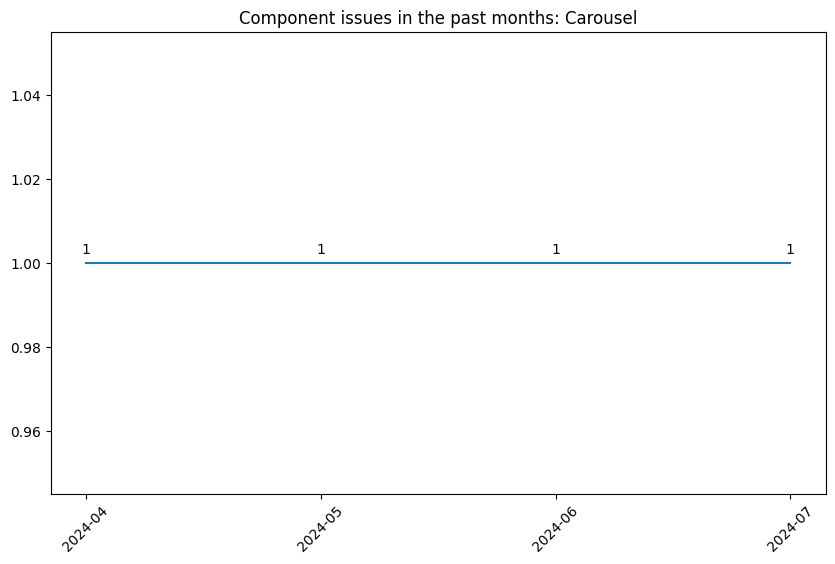

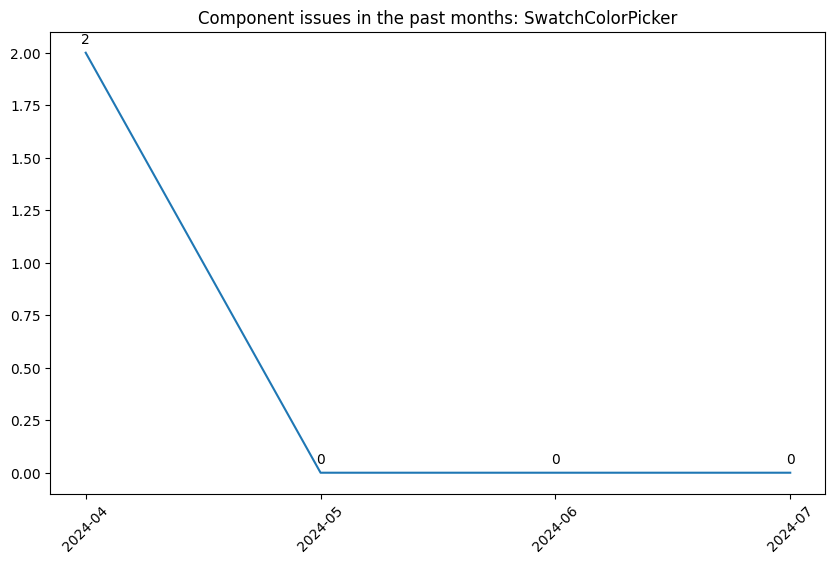

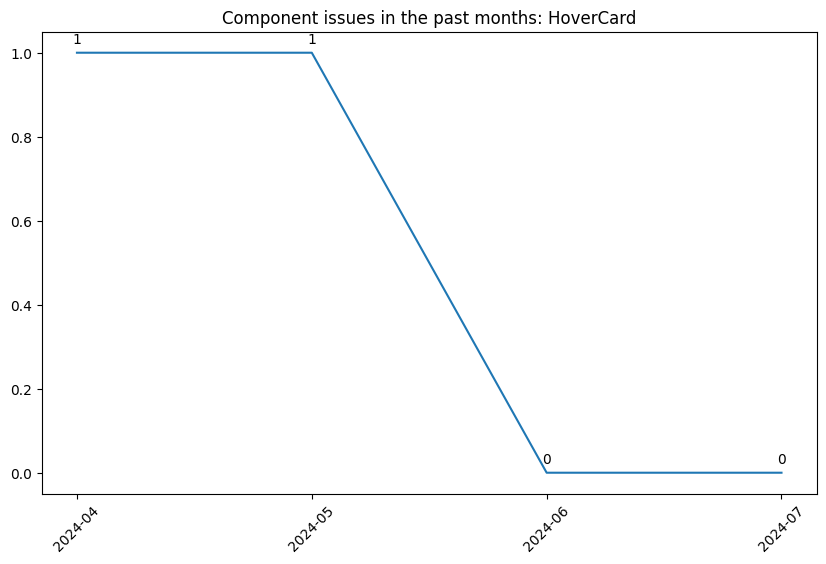

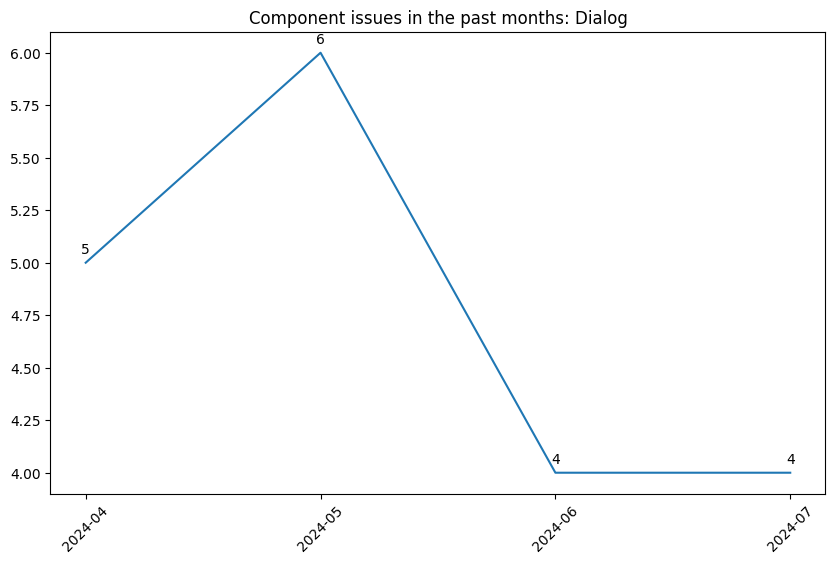

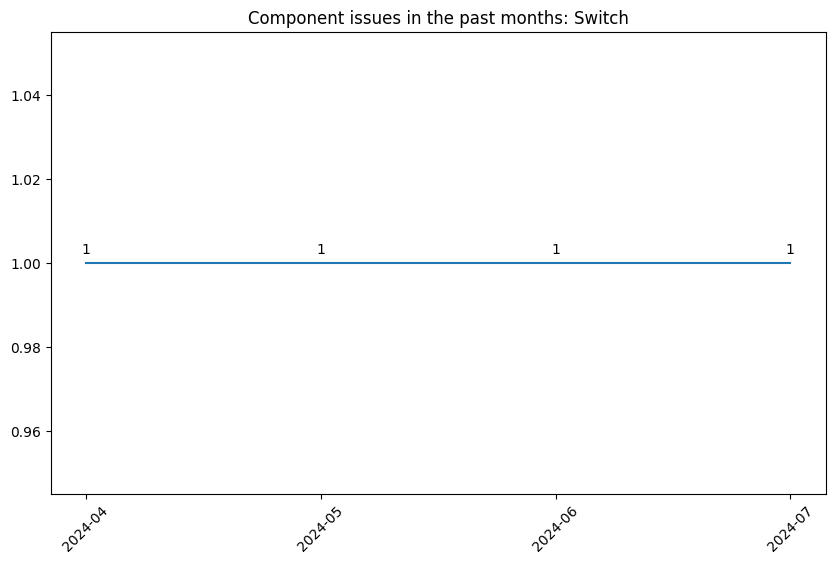

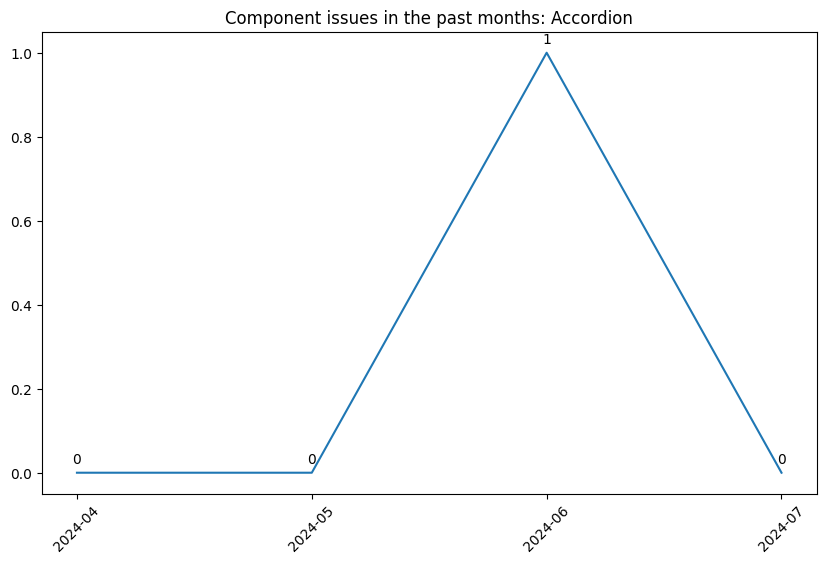

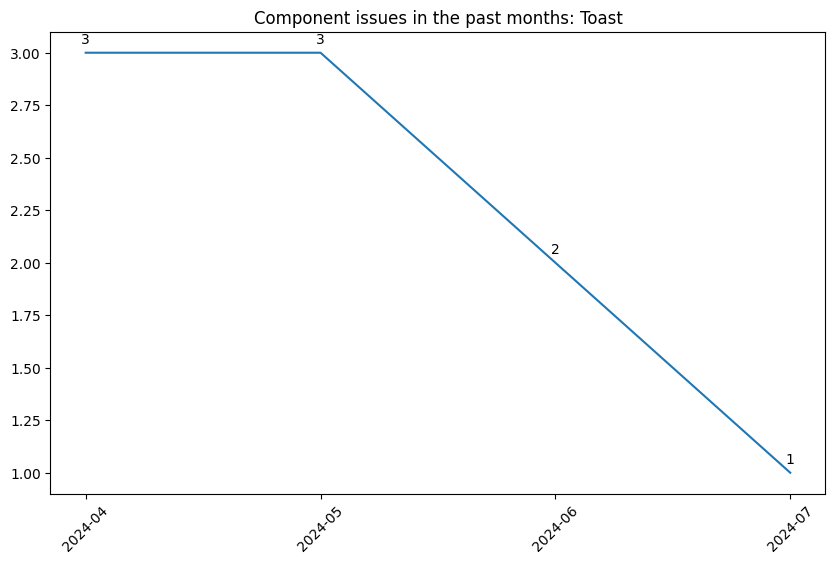

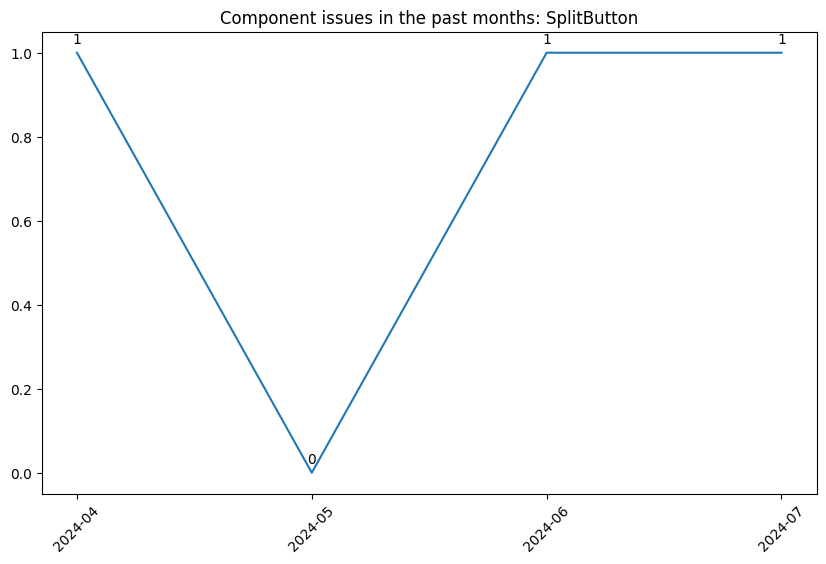

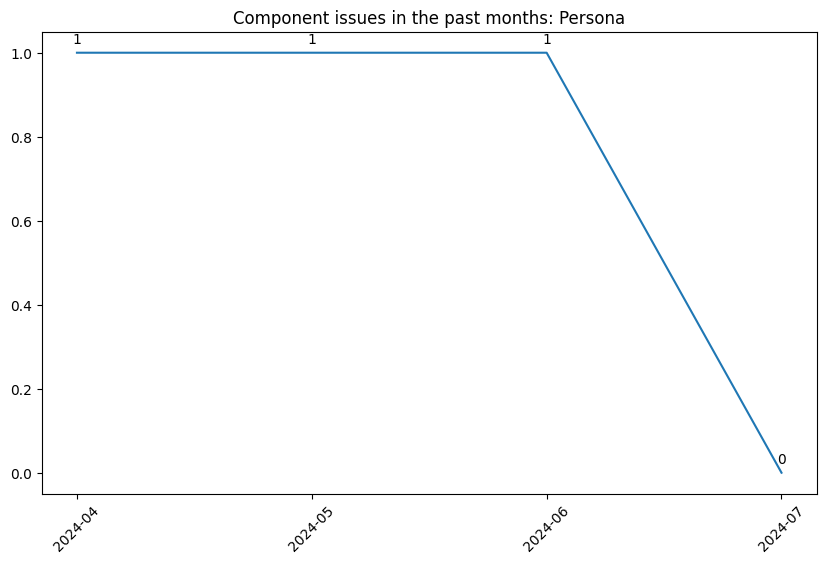

In [16]:
import matplotlib.pyplot as plt
from datetime import date, datetime
from collections import Counter
import pandas as pd

component_stats = {}

for component in sorted(component_names):
    component_stats[component] = {month: 0 for month in used_months}

for month, issues in all_issues.items():
    open_issues = [issue for issue in issues if issue["state"] == "open"]

    for issue in open_issues:
        for label in issue["labels"]:
            if not label.startswith("Component: "):
                continue

            component_name = label.replace("Component: ", "")

            component_stats[component_name][month] += 1


for component, stats in component_stats.items():
    _, ax = plt.subplots(figsize=(10, 6))
    component_values = list(stats.values())

    for i, txt in enumerate(component_values):
        ax.annotate(
            txt,
            (used_months[i], component_values[i]),
            textcoords="offset points",
            xytext=(0, 7),
            ha="center",
        )

    ax.set_title(f"Component issues in the past months: {component}")
    plt.xticks(rotation=45)
    plt.plot(used_months, component_values, label=component)
    plt.show()


